In [26]:
import pandas as pd
import numpy as np

In [27]:
housing = pd.read_csv('housing.csv', index_col=0)

In [28]:
b0=1
b1=2
housing['GuessResponse']=b0+b1*housing['RM']

In [29]:
housing['observederror']= housing['MEDV']-housing['GuessResponse']
indices=[7,20,100]
print(housing['observederror'].loc[indices])

7      13.756
20      1.460
100    13.046
Name: observederror, dtype: float64


In [30]:
print(housing.columns)


Index(['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV', 'GuessResponse',
       'observederror'],
      dtype='object')


In [31]:
housing['error'] = housing['MEDV'] - housing['GuessResponse']


In [32]:
sse = (housing['error'] ** 2).sum()
print('Sum of squared error is', sse)


Sum of squared error is 75291.322588


In [33]:
import matplotlib.pyplot as plt
% matplotlib inline
plt.figure(figsize=(10, 10))
plt.scatter(housing['RM'], housing['MEDV'], color='g', label='real')
plt.scatter(housing['RM'], housing['y'], color='b', label='model')
plt.plot(housing['RM'], housing['GuessResponse'], color='red', label='Model Line')
plt.plot(housing['RM'], housing['BestResponse'], color='yellow', label='Model Line')
plt.xlabel('RM/number')
plt.ylabel('MEDV/$1000')
plt.xlim
plt.legend()
plt.show()


UsageError: Line magic function `%` not found.


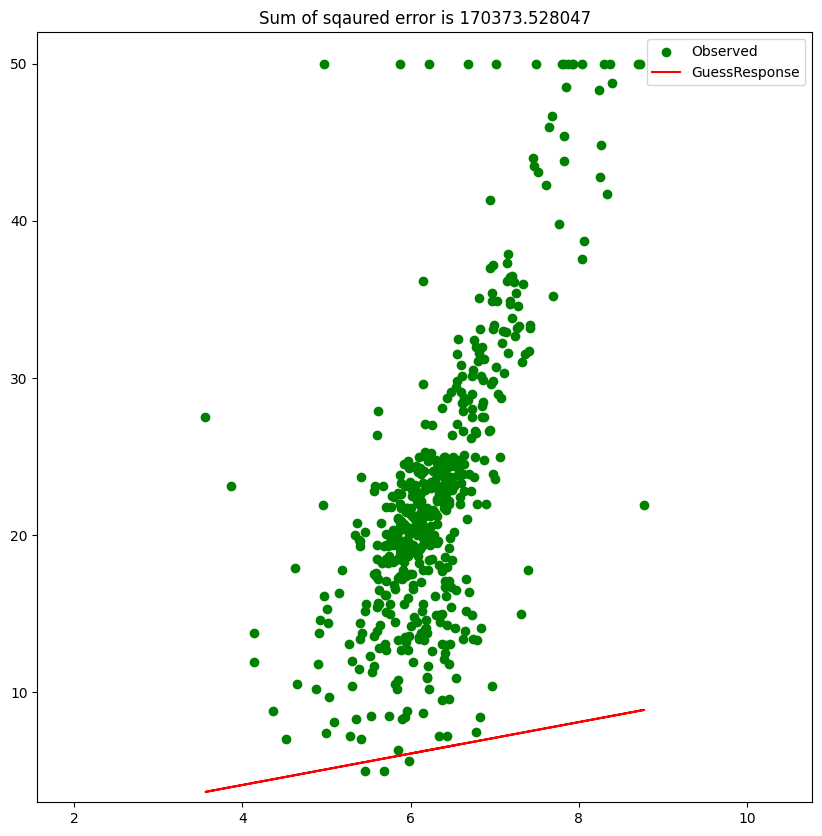

In [34]:
# lets try to guess what are the real values of intercept and slope
# we call our guess b0, b1...
# Try to assign the value of b0, b1 to get a straight line that can describe our data 
b0 = 0.1
b1 = 1
housing['GuessResponse'] = b0 + b1*housing['RM']

# Also want to know the error of of guess...
# This show how far is our guess response from the true response
housing['observederror'] = housing['MEDV'] - housing['GuessResponse']


# plot your estimated line together with the points
plt.figure(figsize=(10, 10))
plt.title('Sum of sqaured error is {}'.format((((housing['observederror'])**2)).sum()))
plt.scatter(housing['RM'], housing['MEDV'], color='g', label='Observed')
plt.plot(housing['RM'], housing['GuessResponse'], color='red', label='GuessResponse')
plt.legend()
plt.xlim(housing['RM'].min()-2, housing['RM'].max()+2)
plt.ylim(housing['MEDV'].min()-2, housing['MEDV'].max()+2)
plt.show()

/tmp/ipykernel_16462/1392618701.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b0_ols = model.params[0]
/tmp/ipykernel_16462/1392618701.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b1_ols = model.params[1]


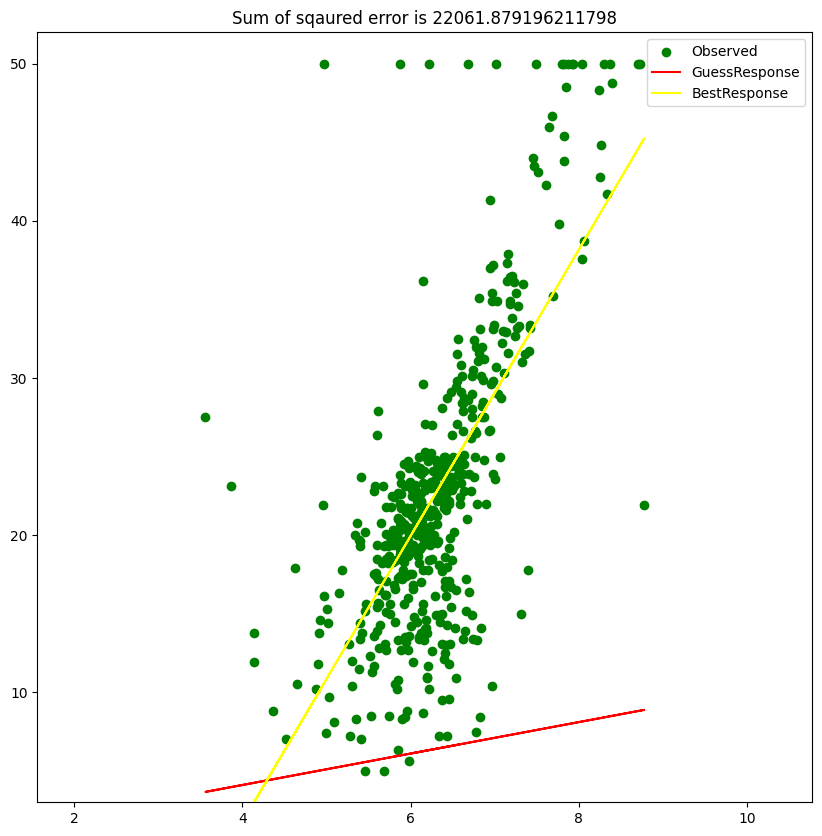

In [37]:
import statsmodels.formula.api as smf
formula = 'MEDV~RM'
model = smf.ols(formula=formula, data=housing).fit()

# Here are estimated intercept and slope by least square estimation
# Attribute 'params' returns a list of estimated parameters form model
b0_ols = model.params[0]
b1_ols = model.params[1]

housing['BestResponse'] = b0_ols + b1_ols*housing['RM']

# Also want to know the error of of guess...
housing['error'] = housing['MEDV'] - housing['BestResponse']


# plot your estimated line together with the points
plt.figure(figsize=(10, 10))
# See if the error drops after you use least square method
plt.title('Sum of sqaured error is {}'.format((((housing['error'])**2)).sum()))
plt.scatter(housing['RM'], housing['MEDV'], color='g', label='Observed')
plt.plot(housing['RM'], housing['GuessResponse'], color='red', label='GuessResponse')
plt.plot(housing['RM'], housing['BestResponse'], color='yellow', label='BestResponse')
plt.legend()
plt.xlim(housing['RM'].min()-2, housing['RM'].max()+2)
plt.ylim(housing['MEDV'].min()-2, housing['MEDV'].max()+2)
plt.show()

In [39]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Wed, 04 Dec 2024   Prob (F-statistic):           2.49e-74
Time:                        19:46:00   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""